In [124]:
pip install kaggle kagglehub


  Using cached kaggle-1.7.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached kagglehub-0.3.11-py3-none-any.whl.metadata (32 kB)
Using cached kaggle-1.7.4.2-py3-none-any.whl (173 kB)
Using cached kagglehub-0.3.11-py3-none-any.whl (63 kB)

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [125]:
import kagglehub

path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

print("Dataset downloaded to:", path)


Dataset downloaded to: /Users/kaamilthobani/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1


In [126]:
import os

download_path = "/Users/kaamilthobani/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1"

# for root, dirs, files in os.walk(download_path):
#     #print("📁", root)
#     for file in files:
#        # print("   └──", file)


In [115]:
path = '/Users/kaamilthobani/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1'


In [127]:
import os
import pandas as pd
path = path+"/fashion-dataset"
csv_path = os.path.join(path, "styles.csv")
image_dir = os.path.join(path, "images")

# Load metadata
df = pd.read_csv(csv_path, on_bad_lines="skip")

print(df.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [128]:
print(df[['id', 'articleType', 'baseColour']].dropna().head())


      id  articleType baseColour
0  15970       Shirts  Navy Blue
1  39386        Jeans       Blue
2  59263      Watches     Silver
3  21379  Track Pants      Black
4  53759      Tshirts       Grey


In [129]:
import pandas as pd

df = df[['id', 'articleType', 'baseColour']].dropna()

# Encode classes
df['articleTypeLabel'] = df['articleType'].astype('category').cat.codes
df['colorLabel'] = df['baseColour'].astype('category').cat.codes

# Save label mappings
article_type_classes = dict(enumerate(df['articleType'].astype('category').cat.categories))
color_classes = dict(enumerate(df['baseColour'].astype('category').cat.categories))

print("Sample classes:")
print(article_type_classes)
print(color_classes)


Sample classes:
{0: 'Accessory Gift Set', 1: 'Baby Dolls', 2: 'Backpacks', 3: 'Bangle', 4: 'Basketballs', 5: 'Bath Robe', 6: 'Beauty Accessory', 7: 'Belts', 8: 'Blazers', 9: 'Body Lotion', 10: 'Body Wash and Scrub', 11: 'Booties', 12: 'Boxers', 13: 'Bra', 14: 'Bracelet', 15: 'Briefs', 16: 'Camisoles', 17: 'Capris', 18: 'Caps', 19: 'Casual Shoes', 20: 'Churidar', 21: 'Clothing Set', 22: 'Clutches', 23: 'Compact', 24: 'Concealer', 25: 'Cufflinks', 26: 'Cushion Covers', 27: 'Deodorant', 28: 'Dresses', 29: 'Duffel Bag', 30: 'Dupatta', 31: 'Earrings', 32: 'Eye Cream', 33: 'Eyeshadow', 34: 'Face Moisturisers', 35: 'Face Scrub and Exfoliator', 36: 'Face Serum and Gel', 37: 'Face Wash and Cleanser', 38: 'Flats', 39: 'Flip Flops', 40: 'Footballs', 41: 'Formal Shoes', 42: 'Foundation and Primer', 43: 'Fragrance Gift Set', 44: 'Free Gifts', 45: 'Gloves', 46: 'Hair Accessory', 47: 'Hair Colour', 48: 'Handbags', 49: 'Hat', 50: 'Headband', 51: 'Heels', 52: 'Highlighter and Blush', 53: 'Innerwear Ves

In [119]:
pip install torch torchvision


^C

Note: you may need to restart the kernel to use updated packages.


In [130]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch
import os

class FashionDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['id']}.jpg")

        try:
            image = Image.open(img_path).convert('RGB')
        except:
            # Handle bad image
            return self.__getitem__((idx + 1) % len(self))

        if self.transform:
            image = self.transform(image)

        article_label = torch.tensor(row['articleTypeLabel'], dtype=torch.long)
        color_label = torch.tensor(row['colorLabel'], dtype=torch.long)

        return image, article_label, color_label


In [ ]:
from sklearn.model_selection import train_test_split

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

df = df.sample(n=2000, random_state=42)  # Try 2k images first


train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

img_dir = "/Users/kaamilthobani/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"
train_data = FashionDataset(train_df, img_dir, transform)
val_data = FashionDataset(val_df, img_dir, transform)

#train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)


In [132]:
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    # def __init__(self, num_article_types, num_colors):
    #     super(FashionCNN, self).__init__()
    #     self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    #     self.pool = nn.MaxPool2d(2, 2)
    #     self.fc1 = nn.Linear(32 * 32 * 32, 128)
    #     # self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    #     # self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    #     # self.pool = nn.MaxPool2d(2, 2)
    #     # self.fc1 = nn.Linear(64 * 32 * 32, 512)

    #     self.article_out = nn.Linear(512, num_article_types)
    #     self.color_out = nn.Linear(512, num_colors)

    # def forward(self, x):
    #     x = self.pool(F.relu(self.conv1(x)))  # (32x64x64)
    #     x = x.view(x.size(0), -1)
    #     x = F.relu(self.fc1(x))
    #     return self.article_out(x), self.color_out(x)
    
    

    # def __init__(self, num_article_types, num_colors):
    #     super(FashionCNN, self).__init__()
        
    #     self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # Output: (32, 64, 64)
    #     self.pool = nn.MaxPool2d(2, 2)                            # Output: (32, 32, 32)
        
    #     self.fc1 = nn.Linear(32 * 32 * 32, 128)
        
    #     self.article_out = nn.Linear(128, num_article_types)
    #     self.color_out = nn.Linear(128, num_colors)

    # def forward(self, x):
    #     x = self.pool(F.relu(self.conv1(x)))  # (B, 32, 32, 32)
    #     x = x.view(x.size(0), -1)             # Flatten
    #     x = F.relu(self.fc1(x))               # Dense layer
    #     return self.article_out(x), self.color_out(x)

    import torch
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self, num_article_types, num_colors):
        super(FashionCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)   # (B, 32, 64, 64)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # (B, 64, 64, 64)
        self.pool = nn.MaxPool2d(2, 2)                            # (B, 64, 32, 32)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # (B, 128, 32, 32)
        self.pool2 = nn.MaxPool2d(2, 2)                           # (B, 128, 16, 16)

        self.dropout = nn.Dropout(0.3)

        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, 128)

        self.article_out = nn.Linear(128, num_article_types)
        self.color_out = nn.Linear(128, num_colors)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = F.relu(self.conv3(x))
        x = self.pool2(x)

        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.relu(self.fc2(x))

        return self.article_out(x), self.color_out(x)



In [133]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionCNN(len(article_type_classes), len(color_classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [141]:
for epoch in range(100):
    model.train()
    running_loss = 0.0
    for images, article_labels, color_labels in train_loader:
        images = images.to(device)
        article_labels = article_labels.to(device)
        color_labels = color_labels.to(device)

        optimizer.zero_grad()
        article_preds, color_preds = model(images)

        loss = criterion(article_preds, article_labels) + criterion(color_preds, color_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {running_loss:.4f}")


Epoch 1 Loss: 39.5714
Epoch 2 Loss: 46.3147
Epoch 3 Loss: 39.9288
Epoch 4 Loss: 43.3168
Epoch 5 Loss: 37.4565
Epoch 6 Loss: 38.9826
Epoch 7 Loss: 35.4319
Epoch 8 Loss: 35.5454
Epoch 9 Loss: 38.4491
Epoch 10 Loss: 32.4851
Epoch 11 Loss: 37.8951
Epoch 12 Loss: 32.7929
Epoch 13 Loss: 35.0091
Epoch 14 Loss: 33.9841
Epoch 15 Loss: 27.0956
Epoch 16 Loss: 34.2811
Epoch 17 Loss: 28.8778
Epoch 18 Loss: 29.6433
Epoch 19 Loss: 34.8584
Epoch 20 Loss: 27.5660
Epoch 21 Loss: 24.5346
Epoch 22 Loss: 27.2537
Epoch 23 Loss: 22.3529
Epoch 24 Loss: 25.6061
Epoch 25 Loss: 24.8974
Epoch 26 Loss: 24.7179
Epoch 27 Loss: 27.7098
Epoch 28 Loss: 24.2522
Epoch 29 Loss: 24.8596
Epoch 30 Loss: 21.6676
Epoch 31 Loss: 32.8323
Epoch 32 Loss: 26.4141
Epoch 33 Loss: 26.1411
Epoch 34 Loss: 22.0358
Epoch 35 Loss: 19.9069
Epoch 36 Loss: 21.5786
Epoch 37 Loss: 18.8861
Epoch 38 Loss: 24.1343
Epoch 39 Loss: 21.5714
Epoch 40 Loss: 24.1416
Epoch 41 Loss: 22.8741
Epoch 42 Loss: 17.5156
Epoch 43 Loss: 19.8445
Epoch 44 Loss: 22.71

In [142]:
from torchvision import transforms
from PIL import Image

def predict_image(img_path, model, transform, device):
    model.eval()
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        type_out, color_out = model(image)
        type_pred = torch.argmax(type_out, dim=1).item()
        color_pred = torch.argmax(color_out, dim=1).item()

    return article_type_classes[type_pred], color_classes[color_pred]

import matplotlib.pyplot as plt

def show_prediction_with_truth(img_path, true_article_label, true_color_label):
    image = Image.open(img_path).convert('RGB')
    plt.imshow(image)
    plt.axis('off')
    
    predicted_type, predicted_color = predict_image(img_path, model, transform, device)

    plt.title(f"🧠 Pred: {predicted_type} ({predicted_color})\n✅ True: {true_article_label} ({true_color_label})")
    plt.show()

    return predicted_type, predicted_color  

def predict_top3(img_path, model, transform, device):
    model.eval()
    image = Image.open(img_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        type_out, color_out = model(image)
        type_probs = F.softmax(type_out, dim=1)[0]
        color_probs = F.softmax(color_out, dim=1)[0]

        type_top3 = torch.topk(type_probs, 3)
        color_top3 = torch.topk(color_probs, 3)

        type_preds = [(article_type_classes[i.item()], type_probs[i].item()) for i in type_top3.indices]
        color_preds = [(color_classes[i.item()], color_probs[i].item()) for i in color_top3.indices]

    return type_preds, color_preds





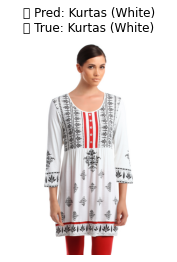

Predicted: Kurtas - White


In [144]:
img_path = os.path.join(img_dir, "54563.jpg")
clothing, color = show_prediction_with_truth(img_path, 'Kurtas', 'White')
#clothing, color = show_prediction_with_truth('/Users/kaamilthobani/Desktop/MasterFolder/Untitled Folder 1/redshirt2.png', 'TShirts', 'red')
print(f"Predicted: {clothing} - {color}")


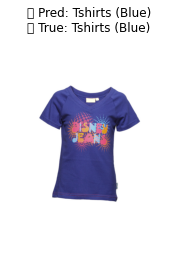

In [146]:
img_path = os.path.join(img_dir, "4217.jpg")
clothing, color = show_prediction_with_truth(img_path, 'Tshirts', 'Blue')
#clothing, color = show_prediction_with_truth('/Users/kaamilthobani/Desktop/MasterFolder/Untitled Folder 1/redshirt2.png', 'TShirts', 'red')
#print(f"Predicted: {clothing} - {color}")

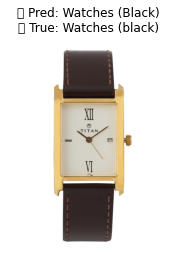

Predicted: Watches - Black


In [148]:
img_path = os.path.join(img_dir, "40516.jpg")
clothing, color = show_prediction_with_truth(img_path, 'Watches', 'black')
#clothing, color = show_prediction_with_truth('/Users/kaamilthobani/Desktop/MasterFolder/Untitled Folder 1/redshirt2.png', 'TShirts', 'red')
print(f"Predicted: {clothing} - {color}")


In [149]:
type_preds, color_preds = predict_top3(img_path, model, transform, device)
print("🧥 Top 3 Clothing Types:")
for label, prob in type_preds:
    print(f" - {label}: {prob*100:.1f}%")

print("🎨 Top 3 Colors:")
for label, prob in color_preds:
    print(f" - {label}: {prob*100:.1f}%")


🧥 Top 3 Clothing Types:
 - Watches: 100.0%
 - Flats: 0.0%
 - Socks: 0.0%
🎨 Top 3 Colors:
 - Black: 82.0%
 - Gold: 17.5%
 - Multi: 0.2%


In [136]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.gradients = None
        self.activations = None
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate(self, input_tensor, class_idx):
        self.model.zero_grad()
        type_out, _ = self.model(input_tensor)
        target = type_out[:, class_idx]
        target.backward()

        grads = self.gradients.mean(dim=[2, 3], keepdim=True)
        cam = (grads * self.activations).sum(dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = F.interpolate(cam, size=(64, 64), mode='bilinear', align_corners=False)
        cam = cam.squeeze().cpu().numpy()
        cam -= cam.min()
        cam /= cam.max()
        return cam


In [137]:
def show_gradcam(img_path, model, transform, device):
    model.eval()
    image = Image.open(img_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Get prediction
    with torch.no_grad():
        type_out, _ = model(input_tensor)
    pred_idx = torch.argmax(type_out, dim=1).item()
    pred_label = article_type_classes[pred_idx]

    # Run Grad-CAM
    cam_extractor = GradCAM(model, model.conv1)
    cam = cam_extractor.generate(input_tensor, pred_idx)

    # Show
    plt.imshow(image.resize((64, 64)))
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.title(f"Grad-CAM for: {pred_label}")
    plt.axis('off')
    plt.show()


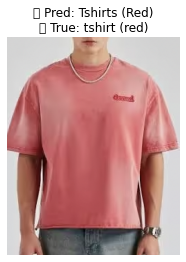

/Users/kaamilthobani/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/module.py:1352: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


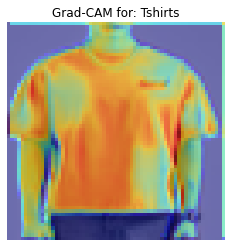

In [63]:
img_path = "/Users/kaamilthobani/Desktop/MasterFolder/Untitled Folder 1/redshirt2.png"

# 1. Ground Truth Comparison
show_prediction_with_truth(img_path, 'tshirt', 'red')

# 2. Top-3 Predictions
predict_top3(img_path, model, transform, device)

# 3. Grad-CAM Visualization
show_gradcam(img_path, model, transform, device)


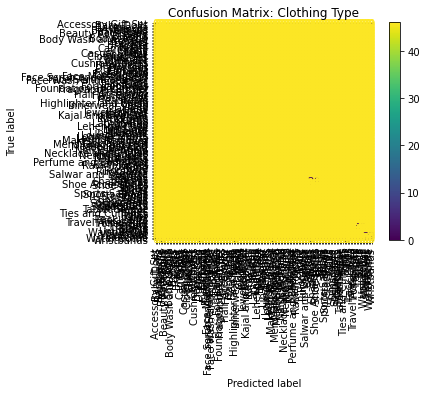

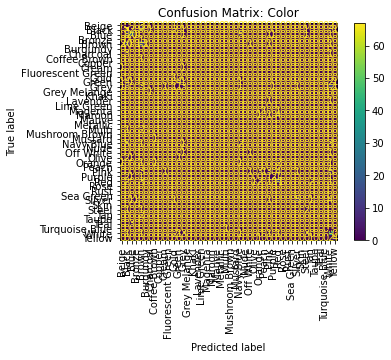

In [150]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_confusion_matrix(model, dataloader, device):
    model.eval()
    all_type_preds, all_type_labels = [], []
    all_color_preds, all_color_labels = [], []

    with torch.no_grad():
        for images, article_labels, color_labels in dataloader:
            images = images.to(device)
            type_out, color_out = model(images)

            all_type_preds.extend(torch.argmax(type_out, dim=1).cpu().numpy())
            all_type_labels.extend(article_labels.numpy())
            all_color_preds.extend(torch.argmax(color_out, dim=1).cpu().numpy())
            all_color_labels.extend(color_labels.numpy())

    # Clothing Type Confusion Matrix
    # cm_type = confusion_matrix(all_type_labels, all_type_preds)
    # disp_type = ConfusionMatrixDisplay(cm_type, display_labels=list(article_type_classes.values()))
    # disp_type.plot(xticks_rotation=90)
    cm_type = confusion_matrix(all_type_labels, all_type_preds, labels=range(len(article_type_classes)))
    disp = ConfusionMatrixDisplay(cm_type, display_labels=list(article_type_classes.values()))

    disp.plot(xticks_rotation=90)

    plt.title("Confusion Matrix: Clothing Type")
    plt.show()

    

    # Color Confusion Matrix
    # cm_color = confusion_matrix(all_color_labels, all_color_preds)
    # disp_color = ConfusionMatrixDisplay(cm_color, display_labels=list(color_classes.values()))
    # disp_color.plot(xticks_rotation=90)
    cm_color = confusion_matrix(all_color_labels, all_color_preds, labels=range(len(color_classes)))
    disp = ConfusionMatrixDisplay(cm_color, display_labels=list(color_classes.values()))
    disp.plot(xticks_rotation=90)

    plt.title("Confusion Matrix: Color")
    plt.show()

evaluate_confusion_matrix(model, val_loader, device)


In [155]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, dataloader, device):
    model.eval()
    all_true_types = []
    all_pred_types = []
    all_true_colors = []
    all_pred_colors = []

    with torch.no_grad():
        for images, article_labels, color_labels in dataloader:
            images = images.to(device)
            article_labels = article_labels.to(device)
            color_labels = color_labels.to(device)

            type_out, color_out = model(images)

            _, pred_type_labels = torch.max(type_out, 1)
            _, pred_color_labels = torch.max(color_out, 1)

            all_true_types.extend(article_labels.cpu().numpy())
            all_pred_types.extend(pred_type_labels.cpu().numpy())
            all_true_colors.extend(color_labels.cpu().numpy())
            all_pred_colors.extend(pred_color_labels.cpu().numpy())

    # Classification
    print("=== Clothing Type Classification ===")
    print("Accuracy:", accuracy_score(all_true_types, all_pred_types))
    print("\n=== Color Classification ===")
    print("Accuracy:", accuracy_score(all_true_colors, all_pred_colors))




In [156]:
evaluate_model(model, val_loader, device)


=== Clothing Type Classification ===
Accuracy: 0.6275

=== Color Classification ===
Accuracy: 0.4425
